In [1]:
import json
import pandas as pd
import numpy as np
import random
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [80]:
sampled_df = pd.read_csv("/shared/3/projects/bangzhao/prosodic_embeddings/sample/sampleProsodicFeature10k_cleaned_sample5kchunk.csv")

In [69]:
sampled_df

index    content  mfcc1_sma3  mfcc2_sma3  mfcc3_sma3  mfcc4_sma3  \
0        11852          .  -12.325640   30.378490    9.012554    6.764302   
1        11853          -    4.958449   23.645394   12.581891   -6.226692   
2        11854    Someone   20.546583    9.694076   15.471456  -23.329299   
3        11855   switched   10.370775    4.864045   22.534335  -11.402363   
4        11856         it   31.602106  -14.171305   10.433389  -36.696092   
...        ...        ...         ...         ...         ...         ...   
2559995    451       that   20.172923  -32.584559  -15.986715  -51.039880   
2559996    452         's   26.817837    7.907092    0.224017  -35.463171   
2559997    453    working   -3.308871    5.759675   -7.866926   -1.668490   
2559998    454        out    2.615957   18.890927   27.078027   14.135052   
2559999    455       well    0.261565  -14.302670  -18.937485  -17.320629   

         F0semitoneFrom27.5Hz_sma3nz  F1frequency_sma3nz  mfcc1_sma3Slope  \
0                          15.821431          861.025630       911.769590   
1                          30.548291          438.596713       -37.198750   
2                          28.119014          788.057502       -11.374005   
3                          12.215422          607.474706        14.637483   
4                          25.953082          802.494987        52.412150   
...                              ...                 ...              ...   
2559995                    12.871223          891.474350       408.890350   
2559996                    26.947651          672.099898        24.274740   
2559997                     7.572900          904.677618        27.273635   
2559998                     7.592255          610.490711       161.293906   
2559999                    12.059381          955.050623       -63.100069   

         mfcc2_sma3Slope  mfcc3_sma3Slope  mfcc4_sma3Slope  \
0             603.060000      -164.588515      -879.693185   
1            -279.785275       372.818590       110.053670   
2              -8.660772        79.847929       125.031192   
3             -36.725638        41.199427        14.697003   
4            -410.059457      -296.690950      -328.514600   
...                  ...              ...              ...   
2559995      -300.876100      -101.161475     -1517.609000   
2559996       663.078225       195.714421       -11.546636   
2559997      -104.746146       -50.505788       -63.393445   
2559998       -51.436521      -204.565632        29.144877   
2559999        94.293111       -21.544278       103.581272   

         F0semitoneFrom27.5Hz_sma3nzSlope  F1frequency_sma3nzSlope  \
0                             1582.143100             -3626.313000   
1                              -40.912050              3319.211000   
2                              -17.147147             -1643.618625   
3                               -8.823972              -213.082134   
4                               -2.115575             -3742.518500   
...                                   ...                      ...   
2559995                       1287.122250               449.125000   
2559996                         12.236721             -2934.854700   
2559997                        -43.124732               153.658613   
2559998                         70.494254              2181.914613   
2559999                         27.379611              -489.692365   

                                          potentialOutPath  
0        /anchor.fm/21/httpsanchor.fms1367adc8podcastpl...  
1        /anchor.fm/21/httpsanchor.fms1367adc8podcastpl...  
2        /anchor.fm/21/httpsanchor.fms1367adc8podcastpl...  
3        /anchor.fm/21/httpsanchor.fms1367adc8podcastpl...  
4        /anchor.fm/21/httpsanchor.fms1367adc8podcastpl...  
...                                                    ...  
2559995  /open.live.bbc.co.uk/do/httpopen.live.bbc.co.u...  
2559996  /open.live.bbc.co.uk/do/httpopen.live.bbc.co.u...  
2559997  /open.live.bbc.

In [8]:
sampled_df.mfcc1_sma3

0         -12.325640
1           4.958449
2          20.546583
3          10.370775
4          31.602106
             ...    
2559995    20.172923
2559996    26.817837
2559997    -3.308871
2559998     2.615957
2559999     0.261565
Name: mfcc1_sma3, Length: 2560000, dtype: float64

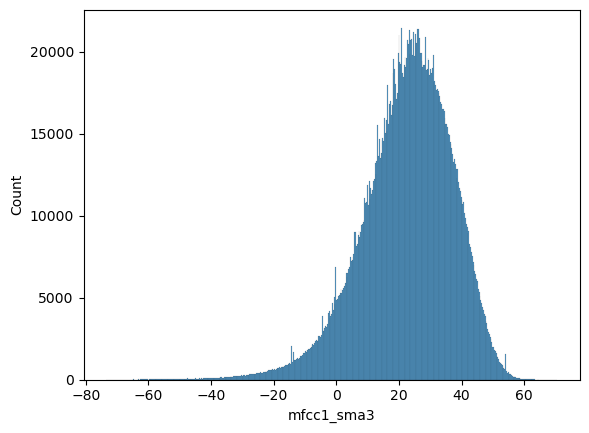

In [17]:
# Create a scatter plot
sns.histplot(x='mfcc1_sma3', data=sampled_df)

# Show the plot
plt.show()

In [78]:
features = ['content', 'mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3',
       'mfcc4_sma3', 'F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz',
       'mfcc1_sma3Slope', 'mfcc2_sma3Slope', 'mfcc3_sma3Slope',
       'mfcc4_sma3Slope', 'F0semitoneFrom27.5Hz_sma3nzSlope',
       'F1frequency_sma3nzSlope']

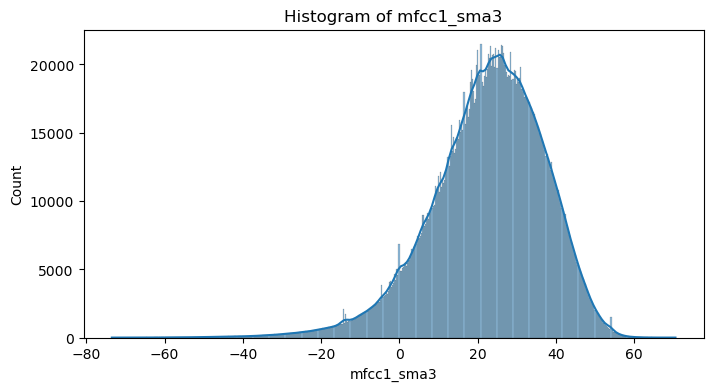

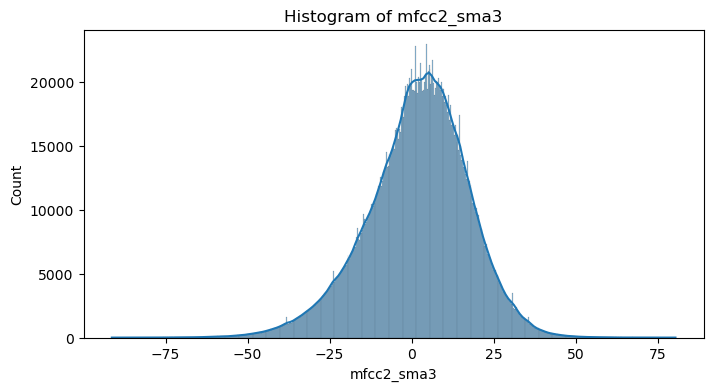

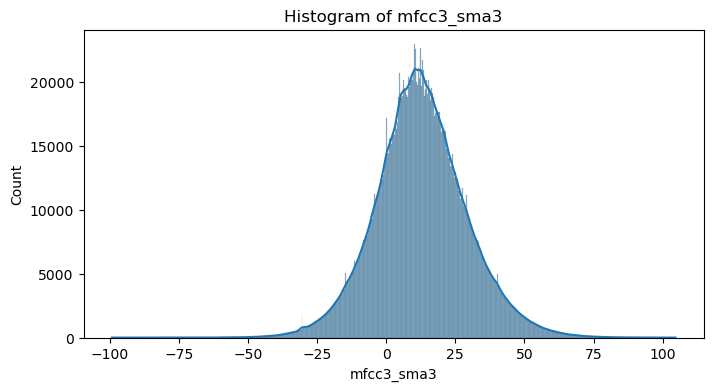

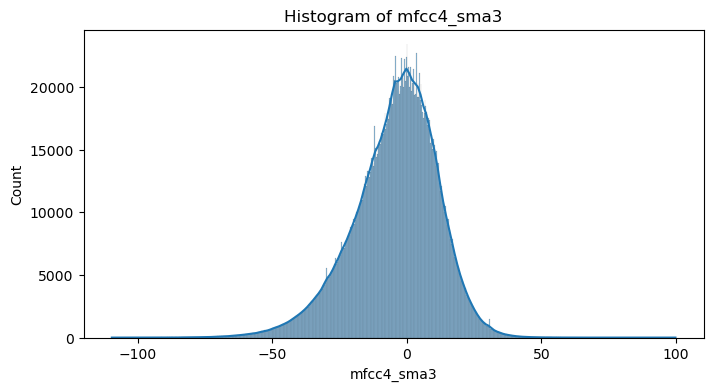

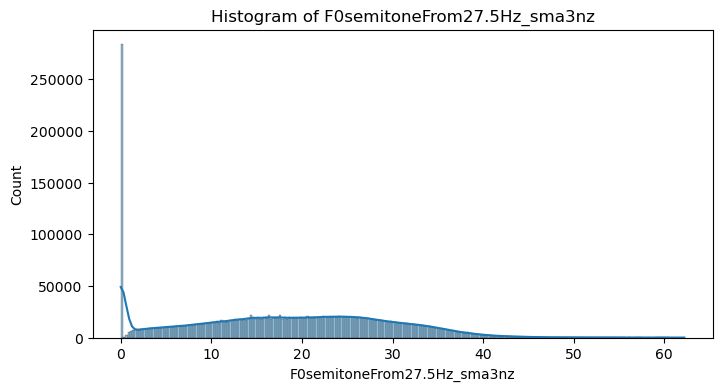

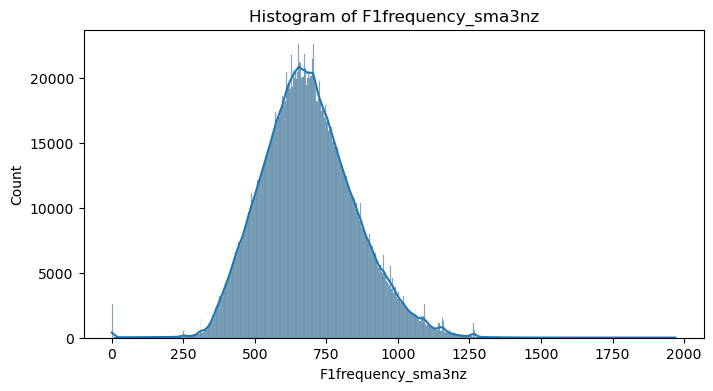

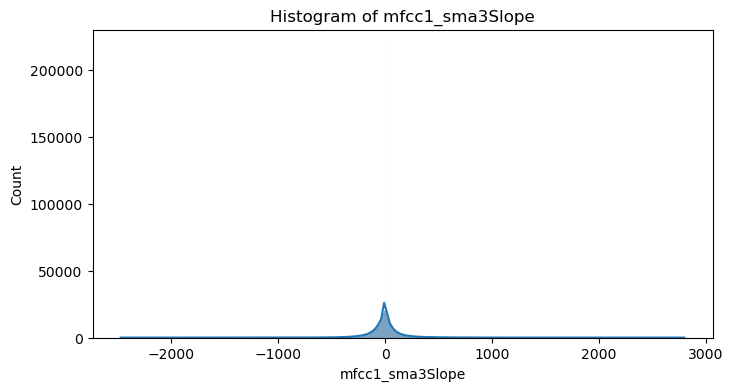

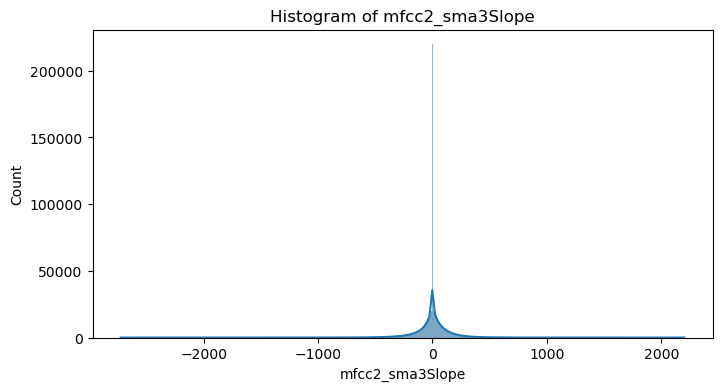

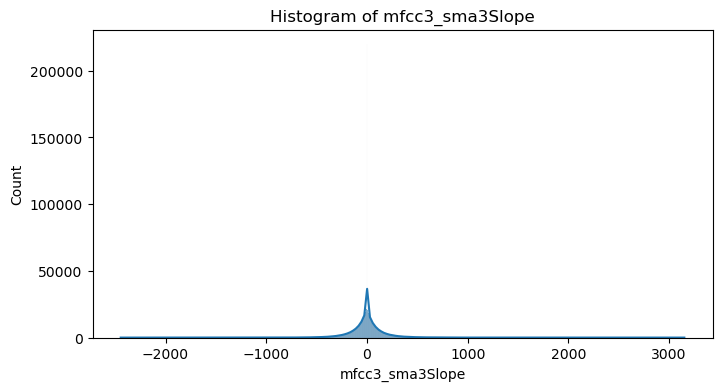

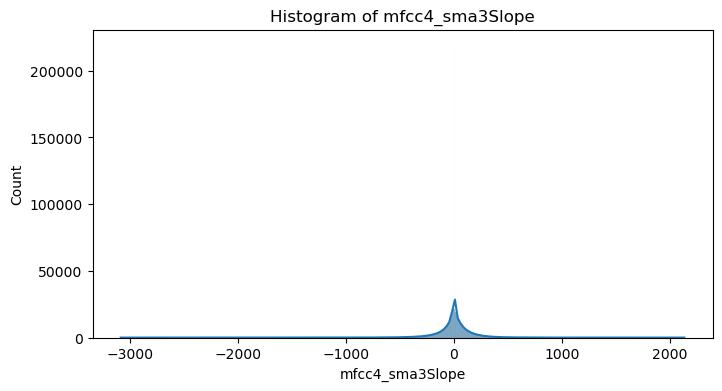

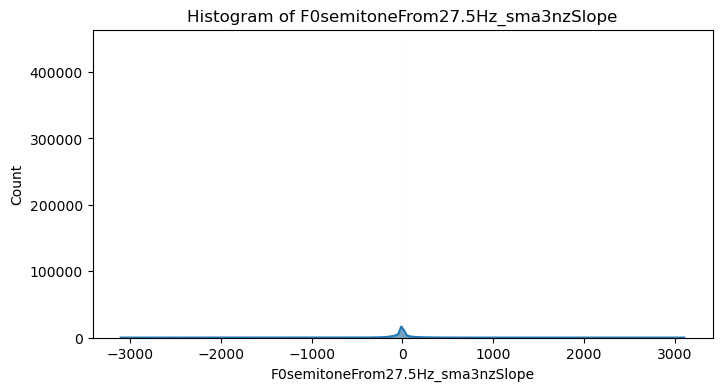

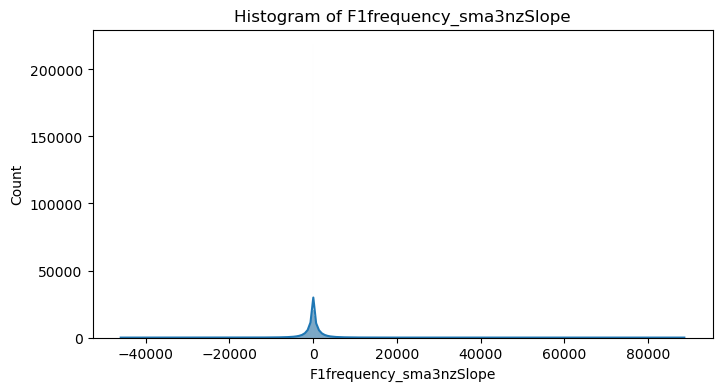

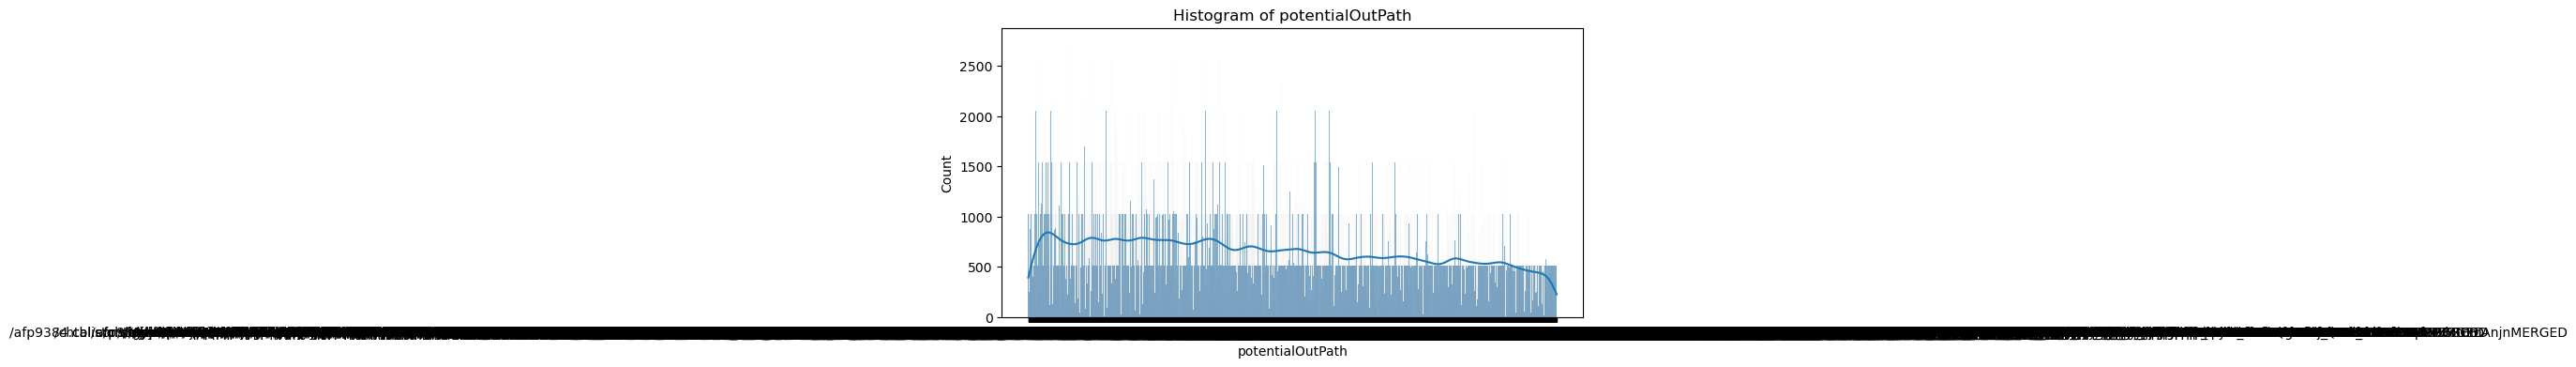

In [7]:
for column in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(sampled_df[column], kde=True)  # kde=True adds a Kernel Density Estimate plot
    plt.title(f'Histogram of {column}')
    plt.show()

In [11]:
sampled_df[['F0semitoneFrom27.5Hz_sma3nz']].describe()

F0semitoneFrom27.5Hz_sma3nz
count                 2.559920e+06
mean                  1.806863e+01
std                   1.127862e+01
min                   0.000000e+00
25%                   9.454841e+00
50%                   1.848971e+01
75%                   2.657183e+01
max                   6.220979e+01

In [13]:
len(sampled_df[sampled_df['F0semitoneFrom27.5Hz_sma3nz']==0])

283665

In [81]:
sampled_df = sampled_df[features]

In [83]:
value_counts_series = sampled_df['content'].value_counts()

# Convert the Series to a DataFrame
value_counts_df = value_counts_series.reset_index()
value_counts_df.columns = ['content', 'counts']

In [88]:
value_counts_df.head(60)

content  counts
0          .  128813
1          ,  125890
2        the   72816
3          I   66994
4         to   61994
5        you   51933
6        and   51113
7       that   49648
8          a   44266
9         of   42341
10        's   39857
11        it   35712
12        in   27711
13        is   23846
14      like   22981
15        we   20736
16       And   19780
17      know   17833
18       was   17159
19        't   16566
20       for   16000
21      this   15284
22      have   14535
23        on   14326
24      just   13350
25       're   13236
26        be   13152
27      they   12741
28      with   12481
29         ?   12353
30      what   12033
31        So   11411
32       not   10924
33       are   10846
34        so   10757
35        'm   10178
36        do   10173
37     about    9932
38        my    9693
39        he    9393
40     think    9248
41       but    9201
42      your    9176
43       can    9161
44     there    8927
45       all    8705
46        or    8564
47     going    8411
48        at    8403
49        as    8284
50        me    8103
51    people    7494
52   because    7477
53       don    7257
54        It    7219
55        if    7121
56    really    7071
57       out    6890
58       one    6710
59       You    6517

In [30]:
sampled_subset = sampled_df.sample(n=100000)

<Axes: xlabel='mfcc1_sma3', ylabel='mfcc2_sma3'>

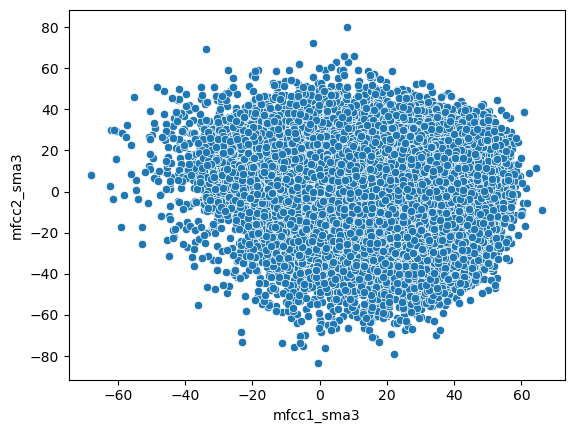

In [31]:
sns.scatterplot(data=sampled_subset, x='mfcc1_sma3', y='mfcc2_sma3')

<Axes: xlabel='mfcc1_sma3', ylabel='mfcc3_sma3'>

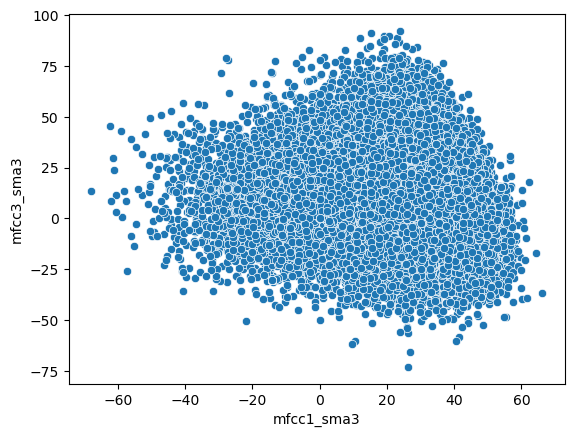

In [32]:
sns.scatterplot(data=sampled_subset, x='mfcc1_sma3', y='mfcc3_sma3')

<Axes: xlabel='mfcc1_sma3', ylabel='mfcc4_sma3'>

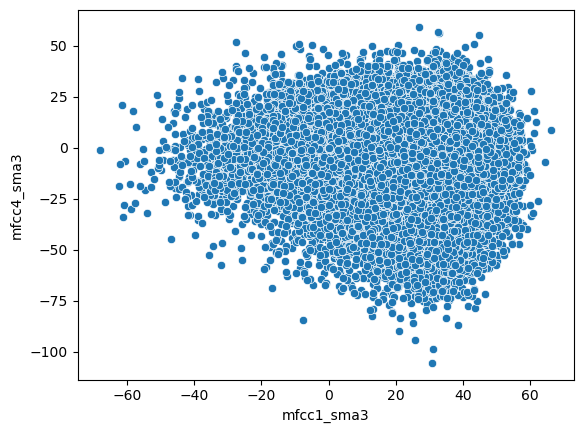

In [33]:
sns.scatterplot(data=sampled_subset, x='mfcc1_sma3', y='mfcc4_sma3')

<Axes: xlabel='mfcc1_sma3', ylabel='F0semitoneFrom27.5Hz_sma3nz'>

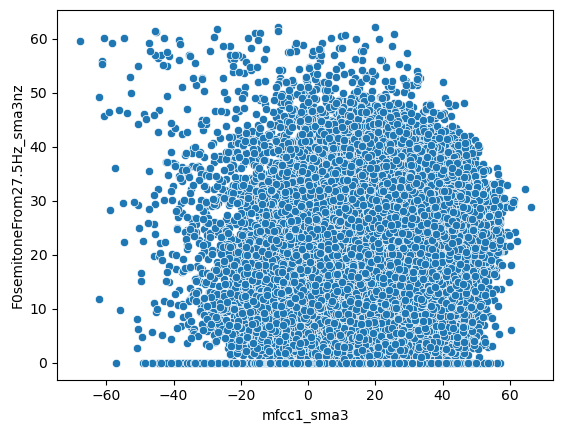

In [34]:
sns.scatterplot(data=sampled_subset, x='mfcc1_sma3', y='F0semitoneFrom27.5Hz_sma3nz')

<Axes: xlabel='mfcc1_sma3', ylabel='F1frequency_sma3nz'>

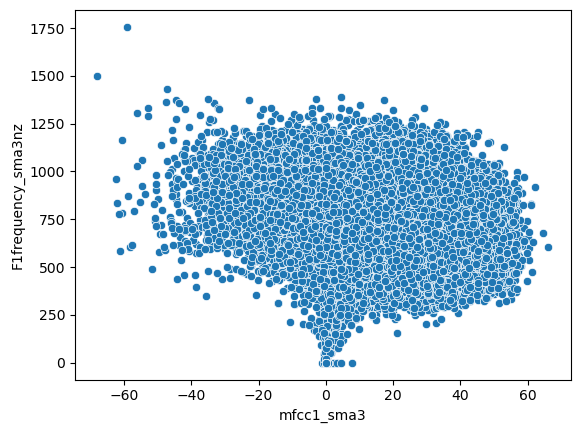

In [35]:
sns.scatterplot(data=sampled_subset, x='mfcc1_sma3', y='F1frequency_sma3nz')

<Axes: xlabel='mfcc1_sma3', ylabel='mfcc1_sma3Slope'>

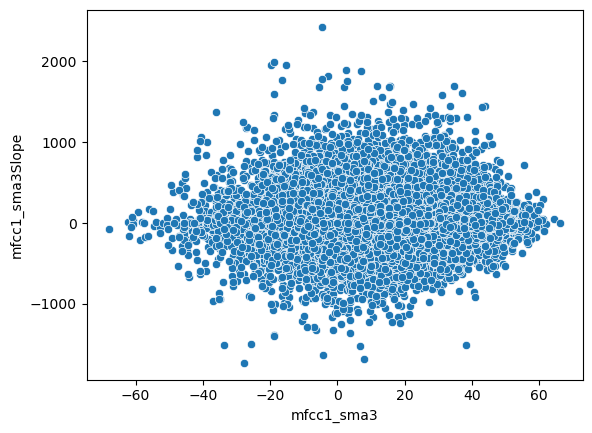

In [36]:
sns.scatterplot(data=sampled_subset, x='mfcc1_sma3', y='mfcc1_sma3Slope')

<Axes: xlabel='mfcc1_sma3', ylabel='mfcc2_sma3Slope'>

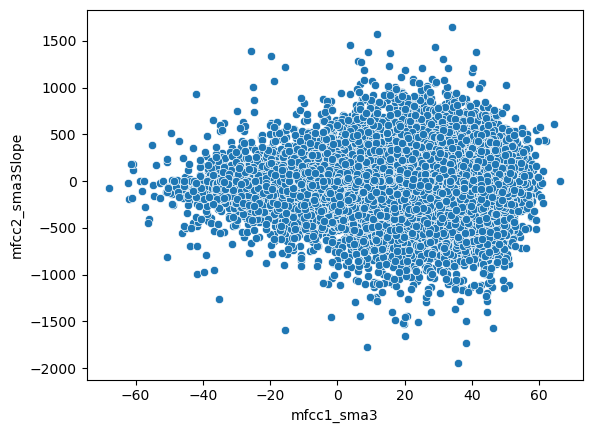

In [37]:
sns.scatterplot(data=sampled_subset, x='mfcc1_sma3', y='mfcc2_sma3Slope')

<Axes: xlabel='mfcc1_sma3', ylabel='mfcc3_sma3Slope'>

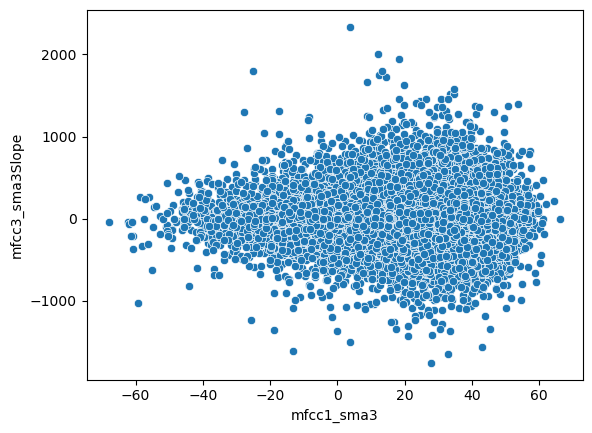

In [38]:
sns.scatterplot(data=sampled_subset, x='mfcc1_sma3', y='mfcc3_sma3Slope')

<Axes: xlabel='mfcc1_sma3', ylabel='mfcc4_sma3Slope'>

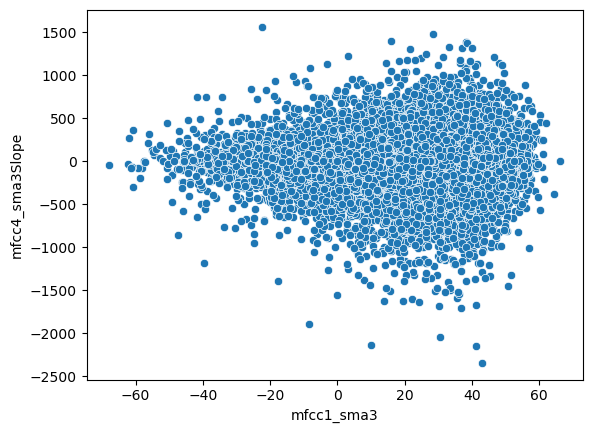

In [39]:
sns.scatterplot(data=sampled_subset, x='mfcc1_sma3', y='mfcc4_sma3Slope')

<Axes: xlabel='mfcc2_sma3', ylabel='mfcc3_sma3'>

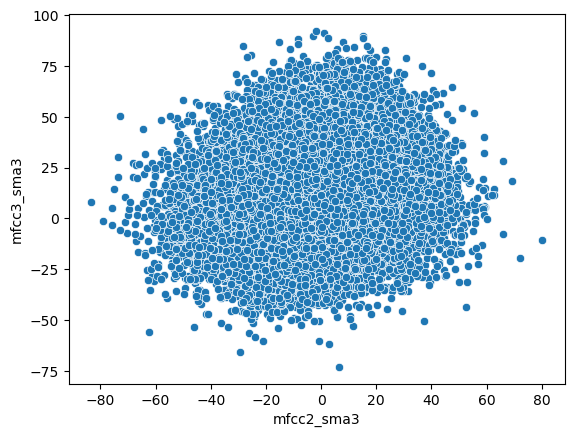

In [42]:
sns.scatterplot(data=sampled_subset, x='mfcc2_sma3', y='mfcc3_sma3')

<Axes: xlabel='mfcc3_sma3', ylabel='mfcc4_sma3'>

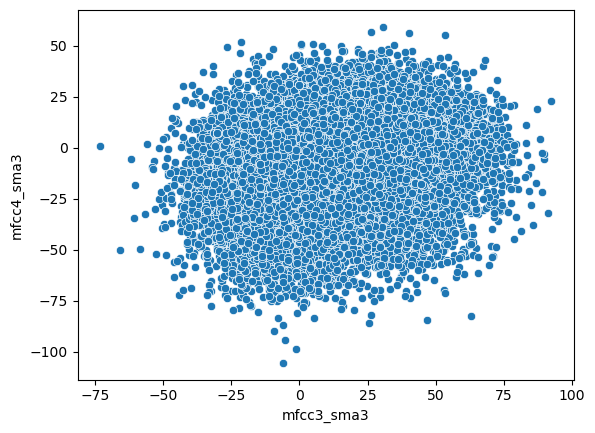

In [40]:
sns.scatterplot(data=sampled_subset, x='mfcc3_sma3', y='mfcc4_sma3')

<Axes: xlabel='mfcc3_sma3Slope', ylabel='mfcc4_sma3Slope'>

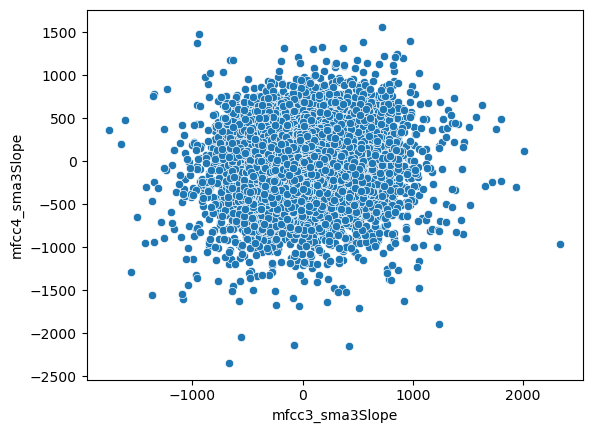

In [41]:
sns.scatterplot(data=sampled_subset, x='mfcc3_sma3Slope', y='mfcc4_sma3Slope')

In [58]:
sampled_df.groupby(['content']).mean().sort_values('mfcc1_sma3')

mfcc1_sma3  mfcc2_sma3  mfcc3_sma3  mfcc4_sma3  \
content                                                   
 hous    -56.943512   10.577687   44.331300  -24.131475   
igil     -47.152285    0.454914  -23.743081    7.826376   
 Mail    -46.499823   -3.033831   22.043122   -0.821755   
Rob      -39.640952   22.851024   -8.094506    0.688096   
bm       -36.345302   32.274418   -7.582568   -4.803593   
...             ...         ...         ...         ...   
 Core     54.803028   -0.688797  -12.231321    4.009726   
rog       55.060036    7.773288  -10.507388    8.062806   
 Magn     55.990867  -42.289190    1.716472   16.551944   
 glyc     57.118322    4.481851  -22.874238   -7.201183   
Based     57.457246   15.063335  -15.167564  -17.247358   

         F0semitoneFrom27.5Hz_sma3nz  F1frequency_sma3nz  mfcc1_sma3Slope  \
content                                                                     
 hous                      59.598190         1018.666700         0.000000   
igil                        0.000000          831.077606       -49.222429   
 Mail                      60.289269          912.180030      -340.493250   
Rob                        13.720345          955.781744      -113.337844   
bm                         24.939833          638.764770       -87.237561   
...                              ...                 ...              ...   
 Core                      23.888876          567.163545              NaN   
rog                        24.291632          454.235232        47.369369   
 Magn                      17.757113          917.517507        31.993086   
 glyc                      26.883499          468.865997        24.656595   
Based                      31.271854          618.538963        20.790136   

         mfcc2_sma3Slope  mfcc3_sma3Slope  mfcc4_sma3Slope  \
content                                                      
 hous           0.000000         0.000000         0.000000   
igil          -71.162419       -91.935797       -87.193740   
 Mail          57.100295       569.177850       -76.829445   
Rob          -267.523577      -156.591820      -214.281393   
bm           -264.148011      -220.379116      -290.401376   
...                  ...              ...              ...   
 Core                NaN              NaN              NaN   
rog           -52.842164       -41.853833        35.725353   
 Magn         176.579082       -41.841428       -21.839299   
 glyc        -140.399539       170.147650       287.859109   
Based         -11.267087       -43.278393         9.809372   

         F0semitoneFrom27.5Hz_sma3nzSlope  F1frequency_sma3nzSlope  
content                                                             
 hous                            0.000000                 0.000000  
igil                             0.000000              2883.594684  
 Mail                          -28.704100             -4835.073000  
Rob                             51.290588               745.797000  
bm                             618.185246             -3134.967500  
...                                   ...                      ...  
 Core                                 NaN                      NaN  
rog                            -19.304043             -1411.097129  
 Magn                          115.601359               312.513964  
 glyc                           13.963709               674.503357  
Based                           -0.617381              -346.380976  

[30788 rows x 12 columns]

In [64]:
sampled_df.groupby(['content']).mean().sort_values('mfcc1_sma3').tail(30)

mfcc1_sma3  mfcc2_sma3  mfcc3_sma3  mfcc4_sma3  \
content                                                          
Rachel           50.155198    2.627048  -32.564394   -3.377659   
 Lan             50.344127  -10.223766   11.344024  -12.728827   
var              50.378297   16.081619   -9.828480  -18.265471   
 GABA            50.457252    8.297817  -18.029867  -19.563208   
Pop              50.564145   -4.573481    0.046178  -39.364031   
Fort             51.141136  -19.124338   -8.094355    0.919273   
 Holt            51.326097    0.483332   25.655228  -20.426044   
erers            51.343740  -20.104570  -17.888357   21.377899   
 salsa           51.633885  -21.345694   -4.206431  -13.152125   
 approvals       51.736166    4.643363   -0.237584  -20.459372   
794              51.749516   24.535635    7.407463  -31.210516   
iger             51.904012  -11.427590   12.927049   22.682407   
Gr               51.919937   -6.988622  -14.360700    9.162406   
elect            51.936048   34.249266    6.489311  -12.884162   
 palpable        51.945539   -4.577389  -30.942770  -15.680051   
hero             52.047452   -7.007843   -1.955077    9.818614   
 watts           52.346498  -16.895918  -13.191017   -2.079950   
 revol           53.144218   13.949783   -9.786790   -1.640173   
 incrim          53.177210   -6.326372   11.015801   -2.812853   
 nu              53.224575    3.374817  -13.396332   -4.467155   
urred            53.583487    2.882187  -20.692237   -5.767412   
 moderators      53.703154   -5.920247  -12.743131    2.956634   
 relat           53.744800   15.779910    4.635506  -13.733278   
 appropriation   53.936590   30.889273   15.226462  -15.483040   
 Widow           54.584105   20.324022   -4.698084  -18.824181   
 Core            54.803028   -0.688797  -12.231321    4.009726   
rog              55.060036    7.773288  -10.507388    8.062806   
 Magn            55.990867  -42.289190    1.716472   16.551944   
 glyc            57.118322    4.481851  -22.874238   -7.201183   
Based            57.457246   15.063335  -15.167564  -17.247358   

                F0semitoneFrom27.5Hz_sma3nz  F1frequency_sma3nz  \
content                                                           
Rachel                            18.271348          645.926630   
 Lan                              21.454791          529.347033   
var                               30.735308          657.555230   
 GABA                             23.891139          569.580790   
Pop                               31.545825          807.075870   
Fort                               0.000000          819.637039   
 Holt                             22.156523          699.551861   
erers                              5.343069          723.069636   
 salsa                            31.246898          790.697717   
 approvals                        14.461292          725.380633   
794                               24.187657          724.324150   
iger                              22.637922          514.846618   
Gr                                25.052531          689.402396   
elect                              0.693313          675.124972   
 palpable                          6.211254          536.692418   
hero                              25.272569          529.585529   
 watts                             0.000000          775.170912   
 revol                            15.349320          761.657752   
 incrim                           14.142690          549.641501   
 nu                               21.310302          625.701093   
urred                             24.657996          604.569456   
 moderators                       31.130784          508.147424   
 relat                            13.579290          688.322137   
 appropriation                    27.262655          573.236900   
 Widow                            24.223248          598.664556   
 Core                             23.888876          567.163545   
rog                        

In [65]:
sampled_df[sampled_df['content']=='Pop']

content  mfcc1_sma3  mfcc2_sma3  mfcc3_sma3  mfcc4_sma3  \
1541475     Pop   50.564145   -4.573481    0.046178  -39.364031   

         F0semitoneFrom27.5Hz_sma3nz  F1frequency_sma3nz  mfcc1_sma3Slope  \
1541475                    31.545825           807.07587       -10.228255   

         mfcc2_sma3Slope  mfcc3_sma3Slope  mfcc4_sma3Slope  \
1541475        25.823509       147.787206          8.73915   

         F0semitoneFrom27.5Hz_sma3nzSlope  F1frequency_sma3nzSlope  
1541475                          53.45466                2867.7979

In [67]:
sampled_df.groupby(['content']).mean().sort_values('F0semitoneFrom27.5Hz_sma3nz').tail(15)

mfcc1_sma3  mfcc2_sma3  mfcc3_sma3  mfcc4_sma3  \
content                                                     
 gou       -11.294657  -54.550199   -2.561444  -54.302765   
 Comm       18.725610  -23.888640   16.797437  -18.012418   
cong         2.357319  -43.551310  -17.235060  -21.952573   
erves        9.695575   17.921339   -3.339837  -23.547385   
ileen       23.720803  -50.701289   -7.397990  -17.119623   
 undercut   -6.063199  -63.372933    1.586230  -55.275297   
 sidebar    30.282490    1.718477  -13.258280  -43.681732   
 Razor      14.704402  -31.075471   16.408149   -6.042083   
haven       11.558018  -57.053425  -11.338287  -33.390871   
IR           5.152516  -22.922595   11.643100    9.249304   
 Si          0.755373  -43.623504   58.268529  -14.835982   
 Sci        15.384480  -23.379790   18.848455  -24.843403   
 hous      -56.943512   10.577687   44.331300  -24.131475   
 Mail      -46.499823   -3.033831   22.043122   -0.821755   
link         9.544951  -17.702340  -44.116230  -29.933167   

           F0semitoneFrom27.5Hz_sma3nz  F1frequency_sma3nz  mfcc1_sma3Slope  \
content                                                                       
 gou                         43.137362         1116.231812       126.163884   
 Comm                        43.439686          740.438502       366.144736   
cong                         45.866370         1093.170188         1.704855   
erves                        45.889654          750.531032        49.198197   
ileen                        46.956866          947.961730        75.081061   
 undercut                    47.508341         1183.860868       -10.191399   
 sidebar                     47.817888          901.843872       -50.149518   
 Razor                       48.981238          459.517050       119.710600   
haven                        49.828502          894.012697        -9.505469   
IR                           50.175068          594.027962        -8.582272   
 Si                          50.247749          983.677569      -214.109154   
 Sci                         52.304480          917.643460        35.391019   
 hous                        59.598190         1018.666700         0.000000   
 Mail                        60.289269          912.180030      -340.493250   
link                         61.020855         1040.537700         0.000000   

           mfcc2_sma3Slope  mfcc3_sma3Slope  mfcc4_sma3Slope  \
content                                                        
 gou           -122.599321      -162.714552       -47.880715   
 Comm            11.851505        43.056080      -210.188922   
cong            -78.091725       -20.807830        12.731684   
erves            82.246876         1.641636       -54.019486   
ileen           173.331300        52.451375      -401.703072   
 undercut       -34.620330        -9.118916        68.920611   
 sidebar        -48.270203        52.223813        44.854074   
 Razor          -24.965675       -59.577675        44.313782   
haven           -73.152994       -10.683676       -60.481231   
IR               -2.151987        14.458728        40.248868   
 Si            -155.600193       277.135549      -210.403816   
 Sci            -40.176551        20.933684        45.489849   
 hous             0.000000         0.000000         0.000000   
 Mail            57.100295       569.177850       -76.829445   
link              0.000000         0.000000         0.000000   

           F0semitoneFrom27.5Hz_sma3nzSlope  F1frequency_sma3nzSlope  
content                                                               
 gou                              25.284834               109.715558  
 Comm                              7.356565              2081.319200  
cong                              46.938405               297.778631  
erves                            -20.869602              -876.389420  
ileen                             -2.455579             -1070.849722  
 undercut                        -14.258458

In [75]:
sampled_df = sampled_df[['mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3',
       'mfcc4_sma3', 'F0semitoneFrom27.5Hz_sma3nz', 'F1frequency_sma3nz',
       'mfcc1_sma3Slope', 'mfcc2_sma3Slope', 'mfcc3_sma3Slope',
       'mfcc4_sma3Slope', 'F0semitoneFrom27.5Hz_sma3nzSlope',
       'F1frequency_sma3nzSlope', 'potentialOutPath']]

In [76]:
sampled_df.groupby(['potentialOutPath']).mean().sort_values('F0semitoneFrom27.5Hz_sma3nz')

mfcc1_sma3  mfcc2_sma3  \
potentialOutPath                                                             
/anchor.fm/2t/httpsanchor.fms915ffdcpodcastplay...   16.499426   13.371711   
/anchor.fm/1t/httpsanchor.fms1da11a54podcastpla...    5.849391  -24.002121   
/anchor.fm/21/httpsanchor.fms1fb346f0podcastpla...    6.032491   22.653580   
/audio4.redcircle.com/e0/httpsaudio4.redcircle....   -2.608126    5.955859   
/dts.podtrac.com/ep/httpsdts.podtrac.comredirec...   26.533815   -2.366048   
...                                                        ...         ...   
/cdn.simplecast.com/ab/httpscdn.simplecast.coma...   14.481925  -36.587216   
/anchor.fm/21/httpsanchor.fms149f2f7cpodcastpla...    6.841597  -22.100458   
/play.hubhopper.com/4f/httpsplay.hubhopper.comb...   22.427936  -17.481531   
/anchor.fm/2d/httpsanchor.fms1d53e2c0podcastpla...    4.650248  -21.430393   
/media.transistor.fm/3e/httpsmedia.transistor.f...    8.121568  -42.138783   

                                                    mfcc3_sma3  mfcc4_sma3  \
potentialOutPath                                                             
/anchor.fm/2t/httpsanchor.fms915ffdcpodcastplay...   13.378266    9.925539   
/anchor.fm/1t/httpsanchor.fms1da11a54podcastpla...   17.724318   -0.963454   
/anchor.fm/21/httpsanchor.fms1fb346f0podcastpla...    8.691568   16.659554   
/audio4.redcircle.com/e0/httpsaudio4.redcircle....   12.625355    4.229604   
/dts.podtrac.com/ep/httpsdts.podtrac.comredirec...   24.996927   11.726310   
...                                                        ...         ...   
/cdn.simplecast.com/ab/httpscdn.simplecast.coma...    4.294089   -6.092084   
/anchor.fm/21/httpsanchor.fms149f2f7cpodcastpla...   -8.941725  -27.927670   
/play.hubhopper.com/4f/httpsplay.hubhopper.comb...   13.994233  -21.275507   
/anchor.fm/2d/httpsanchor.fms1d53e2c0podcastpla...   -7.846238  -17.125292   
/media.transistor.fm/3e/httpsmedia.transistor.f...   21.614296    7.239128   

                                                    F0semitoneFrom27.5Hz_sma3nz  \
potentialOutPath                                                                  
/anchor.fm/2t/httpsanchor.fms915ffdcpodcastplay...                     0.000000   
/anchor.fm/1t/httpsanchor.fms1da11a54podcastpla...                     0.000000   
/anchor.fm/21/httpsanchor.fms1fb346f0podcastpla...                     0.000000   
/audio4.redcircle.com/e0/httpsaudio4.redcircle....                     0.000000   
/dts.podtrac.com/ep/httpsdts.podtrac.comredirec...                     0.000000   
...                                                                         ...   
/cdn.simplecast.com/ab/httpscdn.simplecast.coma...                    32.227236   
/anchor.fm/21/httpsanchor.fms149f2f7cpodcastpla...                    32.695953   
/play.hubhopper.com/4f/httpsplay.hubhopper.comb...                    32.955798   
/anchor.fm/2d/httpsanchor.fms1d53e2c0podcastpla...                    33.288784   
/media.transistor.fm/3e/httpsmedia.transistor.f...                    38.501937   

                                                    F1frequency_sma3nz  \
potentialOutPath                                                         
/anchor.fm/2t/httpsanchor.fms915ffdcpodcastplay...          981.306800   
/anchor.fm/1t/httpsanchor.fms1da11a54podcastpla...          695.514650   
/anchor.fm/21/httpsanchor.fms1fb346f0podcastpla...         1018.835900   
/audio4.redcircle.com/e0/httpsaudio4.redcircle....          376.419770   
/dts.podtrac.com/ep/httpsdts.podtrac.comredirec...         1018.732850   
...                                                                ...   
/cdn.simplecast.com/ab/httpscdn.simplecast.coma...          968.416010   
/anchor.fm/21/httpsanchor.fms149f2f7cpodcastpla...          976.178787   
/play.hubhopper.com/4f/httpsplay.hubhopper.comb...          779.752382   
/anchor.fm/2d/httpsanchor.fms1d53e2c0podcastpla...          925.073804   
/media.transistor.fm/3e/httpsmedia.transistor.f...    

In [77]:
sampled_df.groupby(['potentialOutPath']).mean().sort_values('mfcc1_sma3')

mfcc1_sma3  mfcc2_sma3  \
potentialOutPath                                                             
/anchor.fm/24/httpsanchor.fms20d20468podcastpla...  -14.317636   -0.542031   
/anchor.fm/21/httpsanchor.fms1dd814f0podcastpla...  -13.591980   11.942554   
/traffic.libsyn.com/se/httpstraffic.libsyn.coms...  -10.652585    1.793653   
/www.buzzsprout.com/65/httpswww.buzzsprout.com6...   -4.591095    2.822528   
/anchor.fm/2a/httpsanchor.fms178b88d4podcastpla...   -4.521419   -5.183952   
...                                                        ...         ...   
/dts.podtrac.com/ed/httpsdts.podtrac.comredirec...   45.484976  -28.953438   
/anchor.fm/2t/httpsanchor.fmsd9de3e4podcastplay...   45.875542   21.848840   
/www.richardbaileytx.info/po/httpwww.richardbai...   47.775160  -22.116200   
/t.subsplash.com/Yc/httpst.subsplash.comraHR0cH...   48.613032    2.653924   
/anchor.fm/21/httpsanchor.fms1021d648podcastpla...   53.936590   30.889273   

                                                    mfcc3_sma3  mfcc4_sma3  \
potentialOutPath                                                             
/anchor.fm/24/httpsanchor.fms20d20468podcastpla...  -30.380663    7.412612   
/anchor.fm/21/httpsanchor.fms1dd814f0podcastpla...    6.346708   -2.106228   
/traffic.libsyn.com/se/httpstraffic.libsyn.coms...   -0.428852   -0.089806   
/www.buzzsprout.com/65/httpswww.buzzsprout.com6...    1.298282   -0.731178   
/anchor.fm/2a/httpsanchor.fms178b88d4podcastpla...   20.199377   -2.152611   
...                                                        ...         ...   
/dts.podtrac.com/ed/httpsdts.podtrac.comredirec...    8.615505    4.859011   
/anchor.fm/2t/httpsanchor.fmsd9de3e4podcastplay...    3.696529   -9.039832   
/www.richardbaileytx.info/po/httpwww.richardbai...   -8.793238   -3.303621   
/t.subsplash.com/Yc/httpst.subsplash.comraHR0cH...    2.406107    8.072570   
/anchor.fm/21/httpsanchor.fms1021d648podcastpla...   15.226462  -15.483040   

                                                    F0semitoneFrom27.5Hz_sma3nz  \
potentialOutPath                                                                  
/anchor.fm/24/httpsanchor.fms20d20468podcastpla...                     0.000000   
/anchor.fm/21/httpsanchor.fms1dd814f0podcastpla...                     0.000000   
/traffic.libsyn.com/se/httpstraffic.libsyn.coms...                     4.985755   
/www.buzzsprout.com/65/httpswww.buzzsprout.com6...                     0.000000   
/anchor.fm/2a/httpsanchor.fms178b88d4podcastpla...                     8.174850   
...                                                                         ...   
/dts.podtrac.com/ed/httpsdts.podtrac.comredirec...                    16.047889   
/anchor.fm/2t/httpsanchor.fmsd9de3e4podcastplay...                    17.891779   
/www.richardbaileytx.info/po/httpwww.richardbai...                    13.625819   
/t.subsplash.com/Yc/httpst.subsplash.comraHR0cH...                    10.818431   
/anchor.fm/21/httpsanchor.fms1021d648podcastpla...                    27.262655   

                                                    F1frequency_sma3nz  \
potentialOutPath                                                         
/anchor.fm/24/httpsanchor.fms20d20468podcastpla...          310.430660   
/anchor.fm/21/httpsanchor.fms1dd814f0podcastpla...          819.648130   
/traffic.libsyn.com/se/httpstraffic.libsyn.coms...          958.094906   
/www.buzzsprout.com/65/httpswww.buzzsprout.com6...          653.327450   
/anchor.fm/2a/httpsanchor.fms178b88d4podcastpla...          887.035587   
...                                                                ...   
/dts.podtrac.com/ed/httpsdts.podtrac.comredirec...          768.926991   
/anchor.fm/2t/httpsanchor.fmsd9de3e4podcastplay...          676.081171   
/www.richardbaileytx.info/po/httpwww.richardbai...          819.191121   
/t.subsplash.com/Yc/httpst.subsplash.comraHR0cH...          656.000336   
/anchor.fm/21/httpsanchor.fms1021d648podcastpla...    

In [ ]:
sampled_df